# Analysis of annealing results for instances extracted from the first 46 +1 connected components of the conflict graph #

In [47]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import polynomial
import h5py
import seaborn
import matplotlib.backends.backend_pdf

## Inventory ##

In [48]:
d = pd.read_hdf('../data/connectedComponents/maxDelayPrecalc018/inventory.h5')
d.head()

,NLogQubits,NPhysQubits,SuccessProbability,embedding,energy,exact,isValid,maxCoefficientRangeRatio,maxCoefficientRangeRatioEmbedded,penalty_weight_conflict,penalty_weight_unique,repeatTo99,version
instance,,,,,,,,,,,,,
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018//atm_instance_partition0002_delayStep006_maxDelay018.h5,8,NaN,NaN,NaN,0.0,1.0,1.0,4000.0,NaN,0.001,2.0,NaN,2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018//atm_instance_partition0009_delayStep006_maxDelay018.h5,8,NaN,NaN,NaN,0.0,1.0,1.0,2000.0,NaN,0.001,2.0,NaN,2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018//atm_instance_partition0000_delayStep006_maxDelay018.h5,8,NaN,NaN,NaN,0.0,1.0,1.0,4000.0,NaN,0.001,2.0,NaN,2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018//atm_instance_partition0011_delayStep006_maxDelay018.h5,8,NaN,NaN,NaN,0.0,1.0,1.0,4000.0,NaN,0.001,2.0,NaN,2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018//atm_instance_partition0012_delayStep006_maxDelay018.h5,8,NaN,NaN,NaN,0.0,1.0,1.0,4000.0,NaN,0.001,2.0,NaN,2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4


## Add number of conflicts, number of flights and partition number as columns to the inventory ##

In [49]:
d = pd.read_hdf('../data/connectedComponents/maxDelayPrecalc018/inventory.h5')
d.reset_index(inplace=True)

In [50]:
def parseInstance(instancefile):
    substr = instancefile.split('instances/')[1]
    delay = int(substr.split('_delayStep')[1].split('_maxDelay')[0])
    partition = int(substr.split('_partition')[1].split('_delayStep')[0])
    maxDelay = int(substr.split('_maxDelay')[1].split('.h5')[0])
    # get number of flights and conflicts
    instancefile = '../../../../precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_018/atm_instance_partition%04i_delayStep%03i_maxDelay%03i.h5' % (partition, delay, maxDelay)
    f = h5py.File(instancefile, 'r')
    flights = f['atm-instance'].attrs['Number of flights']
    conflicts = f['atm-instance'].attrs['Number of conflicts']
    f.close()


    return delay, partition, flights, conflicts

In [51]:
info = np.array([list(parseInstance(i)) for i in d.instance.values])

In [52]:
d['delayStep'] = info[:, 0]
d['partitionNumber'] = info[:, 1]
d['numFlights'] = info[:, 2]
d['numConflicts'] = info[:, 3]

In [53]:
inventoryProcessed = d.set_index('instance')

In [54]:
inventoryProcessed.to_csv('inventoryProcessed.csv')

In [55]:
inventoryProcessed.set_index(['numFlights', 'numConflicts', 'delayStep']).head()

NLogQubits  NPhysQubits  \
numFlights numConflicts delayStep                            
2          1            6                   8          NaN   
           2            6                   8          NaN   
           1            6                   8          NaN   
                        6                   8          NaN   
                        6                   8          NaN   

                                   SuccessProbability  embedding  energy  \
numFlights numConflicts delayStep                                          
2          1            6                         NaN        NaN     0.0   
           2            6                         NaN        NaN     0.0   
           1            6                         NaN        NaN     0.0   
                        6                         NaN        NaN     0.0   
                        6                         NaN        NaN     0.0   

                                   exact  isValid  maxCoefficientRangeRatio  \
numFlights numConflicts delayStep                                             
2          1            6            1.0      1.0                    4000.0   
           2            6            1.0      1.0                    2000.0   
           1            6            1.0      1.0                    4000.0   
                        6            1.0      1.0                    4000.0   
                        6            1.0      1.0                    4000.0   

                                   maxCoefficientRangeRatioEmbedded  \
numFlights numConflicts delayStep                                     
2          1            6                                       NaN   
           2            6                                       NaN   
           1            6                                       NaN   
                        6                                       NaN   
                        6                                       NaN   

                                   penalty_weight_conflict  \
numFlights numConflicts delayStep                            
2          1            6                            0.001   
           2            6                            0.001   
           1            6                            0.001   
                        6                            0.001   
                        6                            0.001   

                                   penalty_weight_unique  repeatTo99  \
numFlights numConflicts delayStep                                      
2          1            6                            2.0         NaN   
           2            6                            2.0         NaN   
           1            6                            2.0         NaN   
                        6                            2.0         NaN   
                        6                            2.0         NaN   

                                                                    version  \
numFlights numConflicts delayStep                                             
2          1            6          2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4   
           2            6          2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4   
           1            6          2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4   
                        6          2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4   
                        6          2e435e5a6bf8f1d0b5a99a00acb4843cd8c675c4   

                                   partitionNumber  
numFlights numConflicts delayStep                   
2          1            6                        2  
           2            6                        9  
           1            6                        0  
                        6                       11  
                        6                       12

## Restrict to successful runs (partitions 0 to 46) ##

In [56]:
inventoryProcessed = inventoryProcessed[inventoryProcessed.partitionNumber <= 46]
iv = inventoryProcessed

## Check if all data is there ##

In [57]:
presentPartitions = []
complete = True
partitions = range(0, 47)
pws = (0.5, 1, 2)
delaySteps = (3, 6, 9)
for delayStep in delaySteps:
    for partitionNumber in partitions:
        for pw in pws:
            subset = iv[(iv.delayStep == delayStep) & (iv.partitionNumber == partitionNumber) & (iv.penalty_weight_conflict == pw) & (iv.penalty_weight_unique == pw)]
            if len(subset) != 6:
                complete = False
                print("Data for delayStep=%i, partition=%i, penalty weights=%f, is not complete: %i rows in subset" % (delayStep, partitionNumber, pw, len(subset)))
            presentPartitions.append((partitionNumber, delayStep, pw))
if complete:
    print "The data for", len(presentPartitions), "(=", len(delaySteps), "*", len(partitions), "*", len(pws), ") partitions is complete."

The data for 423 (= 3 * 47 * 3 ) partitions is complete.


In [58]:
%matplotlib inline

## Number of logical and physical qubits ##

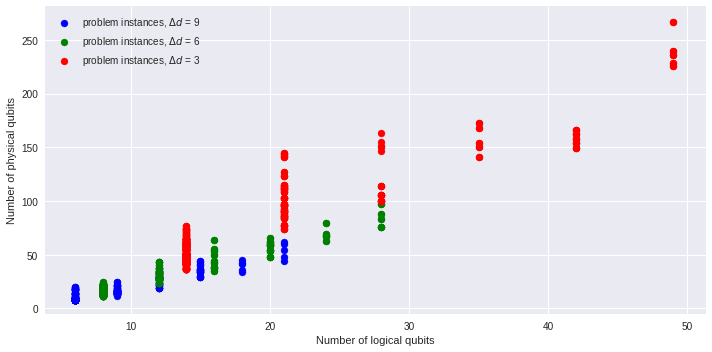

In [59]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
subset = iv[(iv.isValid==True) & (iv.delayStep==9)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='b', label='problem instances, $\Delta d$ = 9');
subset = iv[(iv.isValid==True) & (iv.delayStep==6)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='g', label='problem instances, $\Delta d$ = 6');
subset = iv[(iv.isValid==True) & (iv.delayStep==3)]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='r', label='problem instances, $\Delta d$ = 3');
ax.set_xlabel('Number of logical qubits')
ax.set_ylabel('Number of physical qubits') 
ax.legend();
plt.tight_layout()
pdf = matplotlib.backends.backend_pdf.PdfPages('physicalVsLogicalNumberOfQubits.pdf');
pdf.savefig(figure=fig);
pdf.close();


## Success probability in dependence of the number of delay steps ##
The maximum delay is always 18 minutes. The delay step size is 3, 6 or 9. 

In [60]:
successProb_d3 = iv[(iv.isValid==True) & (iv.delayStep==3)]['SuccessProbability'].dropna().values
successProb_d6 = iv[(iv.isValid==True) & (iv.delayStep==6)]['SuccessProbability'].dropna().values
successProb_d9 = iv[(iv.isValid==True) & (iv.delayStep==9)]['SuccessProbability'].dropna().values

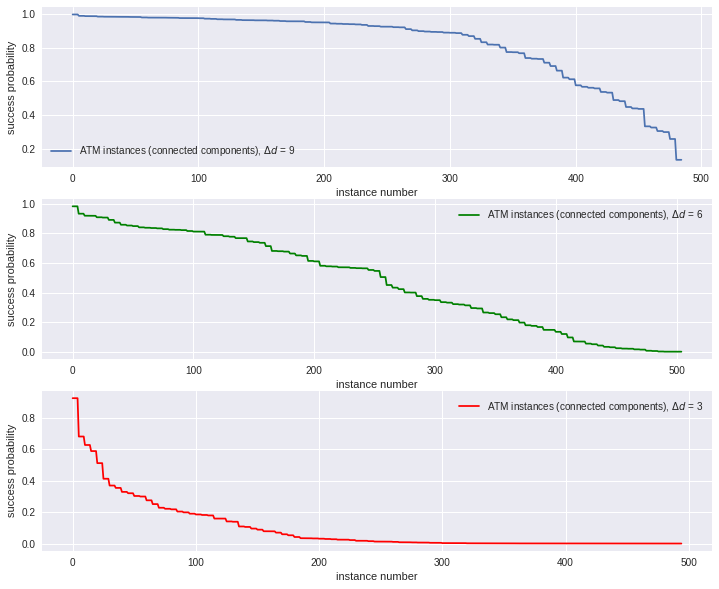

In [61]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_xlabel('instance number')
ax1.set_ylabel('success probability')

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_xlabel('instance number')
ax2.set_ylabel('success probability')

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_xlabel('instance number')
ax3.set_ylabel('success probability')

ax1.plot(np.flipud(np.sort(successProb_d9)), label='ATM instances (connected components), $\Delta d$ = 9');
ax2.plot(np.flipud(np.sort(successProb_d6)), c='g', label='ATM instances (connected components), $\Delta d$ = 6');
ax3.plot(np.flipud(np.sort(successProb_d3)), c='r', label='ATM instances (connected components), $\Delta d$ = 3');

ax1.legend()
ax2.legend()
ax3.legend();
plt.show()

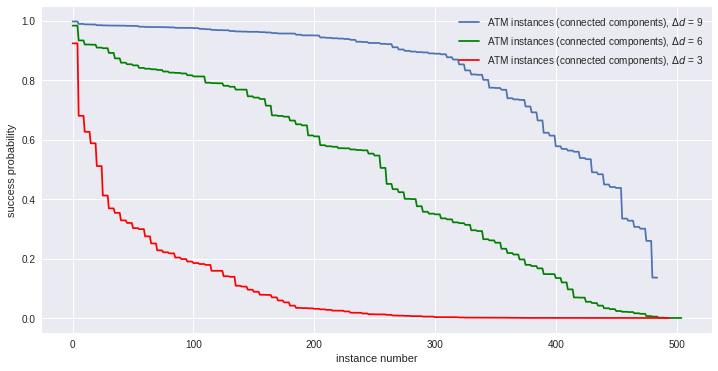

In [62]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('instance number')
ax1.set_ylabel('success probability')


ax1.plot(np.flipud(np.sort(successProb_d9)), label='ATM instances (connected components), $\Delta d$ = 9');
ax1.plot(np.flipud(np.sort(successProb_d6)), c='g', label='ATM instances (connected components), $\Delta d$ = 6');
ax1.plot(np.flipud(np.sort(successProb_d3)), c='r', label='ATM instances (connected components), $\Delta d$ = 3');

ax1.legend()

plt.show()

## Success probability depending on instance parameters ##

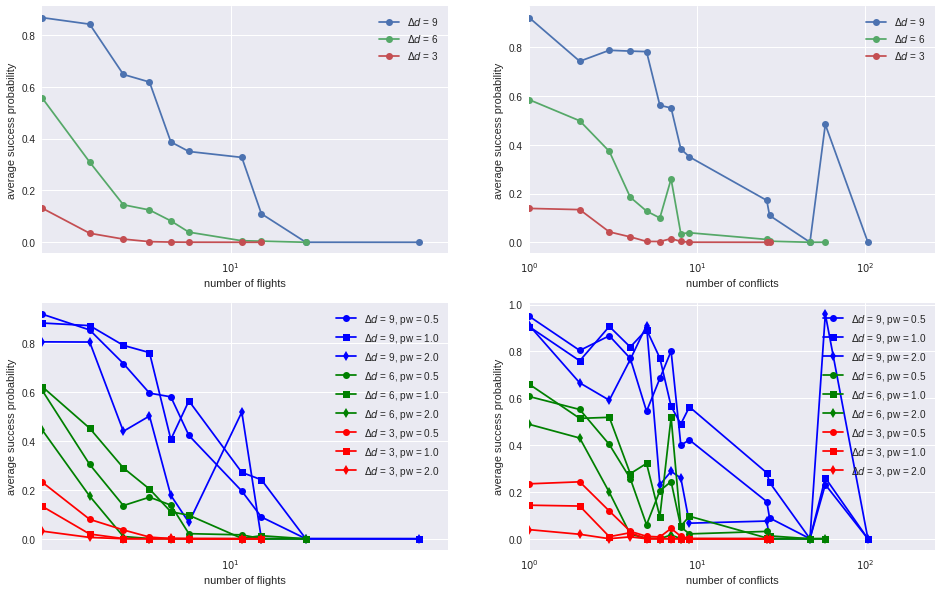

In [63]:
# vs. flights
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numFlights')['SuccessProbability'].mean()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numFlights')['SuccessProbability'].mean()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numFlights')['SuccessProbability'].mean()

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(2,2,1)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax1)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax1)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax1)
ax1.set_xscale('log')
ax1.set_ylabel('average success probability');
ax1.set_xlabel('number of flights');
ax1.legend(loc='best');

# vs. conflicts
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numConflicts')['SuccessProbability'].mean()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numConflicts')['SuccessProbability'].mean()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numConflicts')['SuccessProbability'].mean()

ax2 = fig.add_subplot(2,2,2)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend(loc='best');

# vs. flights, different penalty weights
d3_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()

ax3 = fig.add_subplot(2,2,3)
d9_pw05.plot(marker = 'o', c='b', label='$\Delta d$ = 9, pw = 0.5', ax=ax3)
d9_pw10.plot(marker = 's', c='b', label='$\Delta d$ = 9, pw = 1.0', ax=ax3)
d9_pw20.plot(marker = 'd', c='b', label='$\Delta d$ = 9, pw = 2.0', ax=ax3)
d6_pw05.plot(marker = 'o', c='g', label='$\Delta d$ = 6, pw = 0.5', ax=ax3)
d6_pw10.plot(marker = 's', c='g', label='$\Delta d$ = 6, pw = 1.0', ax=ax3)
d6_pw20.plot(marker = 'd', c='g', label='$\Delta d$ = 6, pw = 2.0', ax=ax3)
d3_pw05.plot(marker = 'o', c='r', label='$\Delta d$ = 3, pw = 0.5', ax=ax3)
d3_pw10.plot(marker = 's', c='r', label='$\Delta d$ = 3, pw = 1.0', ax=ax3)
d3_pw20.plot(marker = 'd', c='r', label='$\Delta d$ = 3, pw = 2.0', ax=ax3)
ax3.set_xscale('log')
ax3.set_ylabel('average success probability');
ax3.set_xlabel('number of flights');
ax3.legend(loc='best');

# vs. conflicts, different penalty weights
d3_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d3_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d3_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()
d6_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d6_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d6_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()
d9_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d9_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d9_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()

ax4 = fig.add_subplot(2,2,4)
d9_pw05.plot(marker = 'o', c='b', label='$\Delta d$ = 9, pw = 0.5', ax=ax4)
d9_pw10.plot(marker = 's', c='b', label='$\Delta d$ = 9, pw = 1.0', ax=ax4)
d9_pw20.plot(marker = 'd', c='b', label='$\Delta d$ = 9, pw = 2.0', ax=ax4)
d6_pw05.plot(marker = 'o', c='g', label='$\Delta d$ = 6, pw = 0.5', ax=ax4)
d6_pw10.plot(marker = 's', c='g', label='$\Delta d$ = 6, pw = 1.0', ax=ax4)
d6_pw20.plot(marker = 'd', c='g', label='$\Delta d$ = 6, pw = 2.0', ax=ax4)
d3_pw05.plot(marker = 'o', c='r', label='$\Delta d$ = 3, pw = 0.5', ax=ax4)
d3_pw10.plot(marker = 's', c='r', label='$\Delta d$ = 3, pw = 1.0', ax=ax4)
d3_pw20.plot(marker = 'd', c='r', label='$\Delta d$ = 3, pw = 2.0', ax=ax4)
ax4.set_xscale('log')
ax4.set_ylabel('average success probability');
ax4.set_xlabel('number of conflicts');
ax4.legend(loc='best');

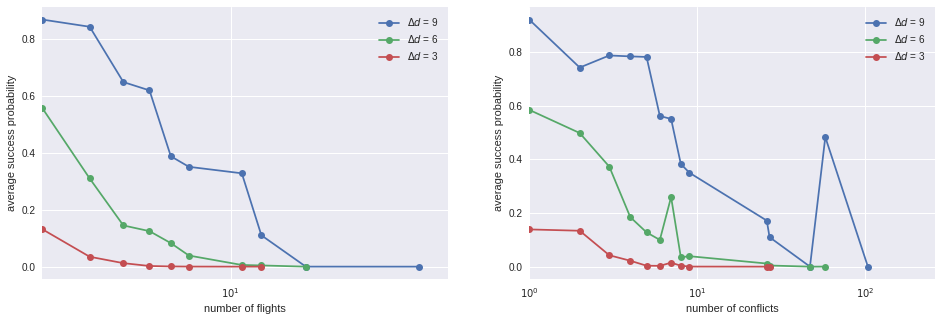

In [64]:
# vs. flights
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numFlights')['SuccessProbability'].mean()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numFlights')['SuccessProbability'].mean()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numFlights')['SuccessProbability'].mean()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax1)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax1)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax1)
ax1.set_xscale('log')
ax1.set_ylabel('average success probability');
ax1.set_xlabel('number of flights');
ax1.legend(loc='best');

# vs. conflicts
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numConflicts')['SuccessProbability'].mean()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numConflicts')['SuccessProbability'].mean()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numConflicts')['SuccessProbability'].mean()

ax2 = fig.add_subplot(1,2,2)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend(loc='best');

# vs. flights, different penalty weights
d3_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_flights_and_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Maximum coefficient range ratio of embedded QUBO for different delay step sizes ##

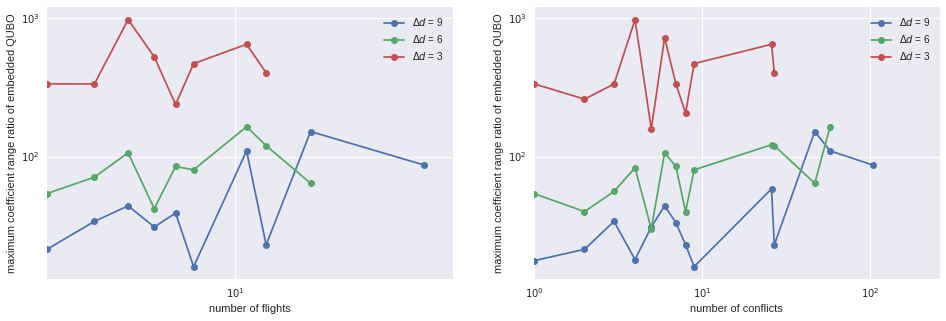

In [65]:
# vs. flights
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax1)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax1)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax1)
ax1.set_ylabel('maximum coefficient range ratio of embedded QUBO');
ax1.set_xlabel('number of flights');
ax1.legend();
ax1.set_yscale('log')
ax1.set_xscale('log')


# vs. conflicts
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()

ax2 = fig.add_subplot(1,2,2)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax2)
ax2.set_ylabel('maximum coefficient range ratio of embedded QUBO');
ax2.set_xlabel('number of conflicts');
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend();

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_coefficent_range_ratio_vs_flights_and_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Maximum coefficient range ratio of the QUBO before embedding ##

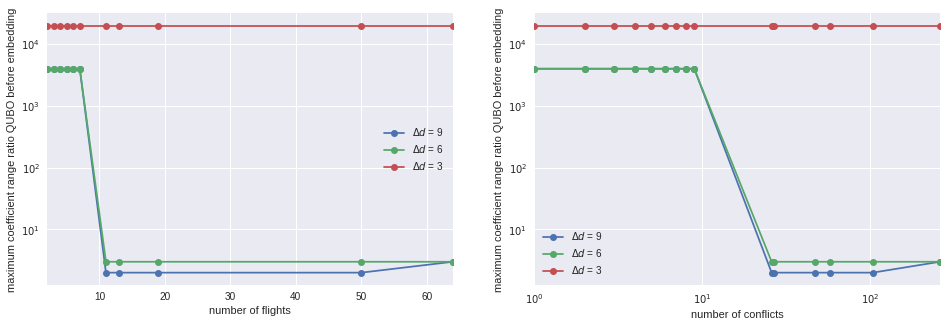

In [66]:
# vs. flights
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numFlights')['maxCoefficientRangeRatio'].max()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numFlights')['maxCoefficientRangeRatio'].max()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numFlights')['maxCoefficientRangeRatio'].max()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax1)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax1)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax1)
#ax1.set_ylim(1.5, 6.5)
ax1.set_yscale('log')
ax1.set_ylabel('maximum coefficient range ratio QUBO before embedding');
ax1.set_xlabel('number of flights');
ax1.legend();


# vs. conflicts
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numConflicts')['maxCoefficientRangeRatio'].max()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numConflicts')['maxCoefficientRangeRatio'].max()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numConflicts')['maxCoefficientRangeRatio'].max()

ax2 = fig.add_subplot(1,2,2)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax2)
#ax2.set_ylim(1.5, 6.5)
ax2.set_yscale('log')
ax2.set_ylabel('maximum coefficient range ratio QUBO before embedding');
ax2.set_xlabel('number of conflicts');
ax2.set_xscale('log')
ax2.legend();

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_coefficent_range_ratio_vs_flights_and_conflicts_before_embedding.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Correlation of low success probability with high ratio of coefficients in the embedded QUBO ##

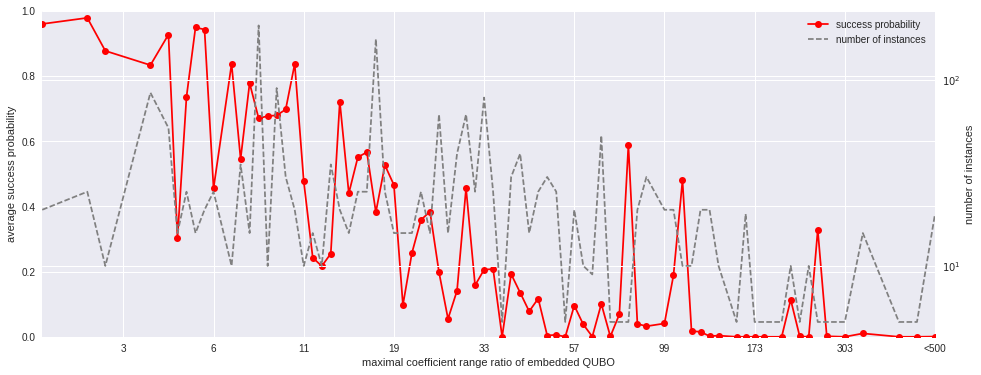

In [67]:
iv = inventoryProcessed
crr_min = iv.maxCoefficientRangeRatio.min()
crr_max = iv.maxCoefficientRangeRatio.max()
bins = np.logspace(np.log2(crr_min)+1, np.log2(500), 100, base=2)
x = iv.groupby(np.digitize(iv.maxCoefficientRangeRatioEmbedded, bins))['SuccessProbability'].mean()
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 1, 1)
x.plot(marker='o', color='r', ax=ax1, label='success probability');
ticks = range(0, 110, 10)
labels = ['<%i' % int(np.round(bins[0])) ] + [int(np.round(bins[t])) for t in ticks[1:-1]] + ['<%i' % int(np.round(bins[-1])) ] 
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)
ax1.set_xlabel('maximal coefficient range ratio of embedded QUBO')
ax1.set_ylabel('average success probability');

y = iv.groupby(np.digitize(iv.maxCoefficientRangeRatioEmbedded, bins))['SuccessProbability'].count()
ax2 = ax1.twinx()
y.plot(linestyle='--', color='gray', ax=ax2, label='number of instances');
y.plot(linestyle='--', color='gray', ax=ax1, label='number of instances');
ax1.set_ybound(upper=1, lower=0)
ax2.set_ylabel('number of instances');
ax2.set_yscale('log')
ax1.legend(loc='upper right');

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_cooefficent_range_ratio.pdf');
pdf.savefig(figure=fig);
pdf.close();

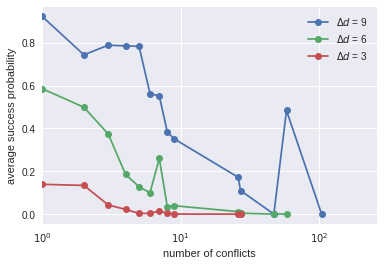

In [68]:
fig = plt.figure()

# vs. conflicts
d3 = inventoryProcessed[inventoryProcessed['delayStep']==3].groupby('numConflicts')['SuccessProbability'].mean()
d6 = inventoryProcessed[inventoryProcessed['delayStep']==6].groupby('numConflicts')['SuccessProbability'].mean()
d9 = inventoryProcessed[inventoryProcessed['delayStep']==9].groupby('numConflicts')['SuccessProbability'].mean()

ax2 = fig.add_subplot(1,1,1)
d9.plot(marker = 'o', label='$\Delta d$ = 9', ax=ax2)
d6.plot(marker = 'o', label='$\Delta d$ = 6', ax=ax2)
d3.plot(marker = 'o', label='$\Delta d$ = 3', ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend()

# vs. flights, different penalty weights
d3_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d3_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==3) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d6_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==6) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d9_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==9) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();